In [19]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
import itertools
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import set_matplotlib_formats
%matplotlib inline
#from matplotlib import cm

In [20]:
# function for fitting with relation to T_in and T_out
# x=T_in, y=T_out, z= size to fit

def fit_simple(x,y,z):
    p0=[0.1,0.001,1.] # starting values
    a=(x,y,z) 
    para,_ = scipy.optimize.leastsq(func_simple_zero,p0,args=a)
    return para

def func_simple_zero(para, x, y, z):
    k1,k2,k3 = para
    z_calc = k1*x + k2*y + k3
    z_diff = z_calc - z
    return z_diff

# Function to calculate z using parameters and any x and y:
def func_simple(para, x, y):
    k1,k2,k3 = para
    z = k1*x + k2*y + k3
    return z

In [3]:
data_keymark = pd.read_csv('hplib-database_heating.csv', delimiter=',')
data_keymark = data_keymark.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
Models=data_keymark['Model'].values.tolist()
Models = list(dict.fromkeys(Models))
K = 273.15
eta_carnot_key = (data_keymark['T_out']+K) / ((data_keymark['T_out']+K)-(data_keymark['T_in']+K))
data_keymark['eta'] = data_keymark['COP'] / eta_carnot_key
data_keymark.fillna(0, inplace=True)
paradf = pd.read_csv('para.csv', delimiter=',')

p1    0.154705
p2   -0.088540
p3    7.378349
Name: COP, dtype: float64


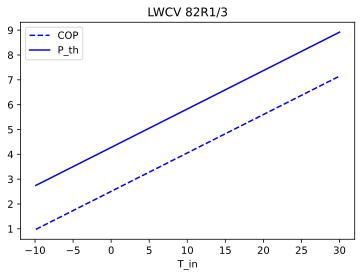

ValueError: Length of values (1) does not match length of index (3514)

In [36]:
data_ref = pd.read_csv(r'validation\AIT_SWCV_122\ait-SWCV-diagramm.csv', delimiter=',', decimal=',')
data_ref.drop(['P_el','P_th'], axis=1)
k1=[]
k2=[]
k3=[]
k4=[]
k5=[]
k6=[]
k7=[]
k8=[]
k9=[]

for model in Models:
    if model=='LWCV 82R1/3':
        data_key = pd.read_csv('hplib-database_heating.csv', delimiter=',')
        data_key = data_key.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
        data_key = data_key.loc[data_key['Model'] == model]
        #temp=['cold', 'average', 'warm']
        
        data_key = data_key.loc[data_key['Climate']== 'average']
        
        K = 273.15
        eta_carnot_key = (data_key['T_out']+K) / ((data_key['T_out']+K)-(data_key['T_in']+K))
        data_key['eta'] = data_key['COP'] / eta_carnot_key
        data_key.fillna(0, inplace=True)
        variables=['P_el', 'P_th', 'COP', 'eta']
        
        for var in variables:
            vars()[var+'_para_key'] = fit_simple(data_key['T_in'],data_key['T_out'],data_key[var])
            data_key[var+'_fit'] = func_simple(globals()[var+'_para_key'], data_key['T_in'], data_key['T_out'])
            data_key[var+'_fit_err'] = (data_key[var+'_fit'] - data_key[var]) / data_key[var] * 100
            d = data_key[var+'_fit_err'].mean(), data_key[var+'_fit_err'].max(), data_key[var+'_fit_err'].min()
            vars()[var+'_err'] = pd.DataFrame(d, index=['mean', 'max', 'min'])

        para_key = pd.DataFrame(index=['p1', 'p2', 'p3'])
        para_key['P_el']=P_el_para_key
        para_key['P_th']=P_th_para_key
        para_key['COP']=COP_para_key
        para_key['eta']=eta_para_key
        data_ref['COP_fit_key'] = func_simple(para_key['COP'], data_ref['T_in'], data_ref['T_out'])
        print(para_key['COP'])
        k1.append(P_th_para_key[0])
        k2.append(P_th_para_key[1])
        k3.append(P_th_para_key[2])
        k4.append(P_el_para_key[0])
        k5.append(P_el_para_key[1])
        k6.append(P_el_para_key[2])
        k7.append(COP_para_key[0])
        k8.append(COP_para_key[1])
        k9.append(COP_para_key[2])    
        
        fig, axes = plt.subplots(nrows=1, ncols=1)
        #data_ref.plot(ax=axes, x='T_in', y, kind='scatter', label='P_el_35', c='Blue', title='P_el: Comparison between reference data and fits')
        data_ref[data_ref['T_out']==55].plot(ax=axes, x='T_in', y='COP_fit_key', kind='line', label='COP', c='Blue', linestyle='--', title=model)
        data_ref['P_th_fit_key'] = func_simple(para_key['P_th'], data_ref['T_in'], data_ref['T_out'])
        data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='COP_fit_key', kind='line', label='P_th', c='Blue', linestyle='-')
        plt.show()
    else:
        continue
paradf=pd.DataFrame()
paradf['Model']=Models
paradf['k1']=k1
paradf['k2']=k2
paradf['k3']=k3
paradf['k4']=k4
paradf['k5']=k5
paradf['k6']=k6
paradf['k7']=k7
paradf['k8']=k8
paradf['k9']=k9
filt = (paradf['k1']>0)
paradf.loc[filt, 'Modus'] = 'On-Off'
filt = (paradf['k1']<0)
paradf.loc[filt, 'Modus'] = 'Inverter'
paradf.loc[paradf['Modus']=='On-Off']
data_key = pd.read_csv('hplib-database_heating.csv', delimiter=',')
data_key = data_key.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})

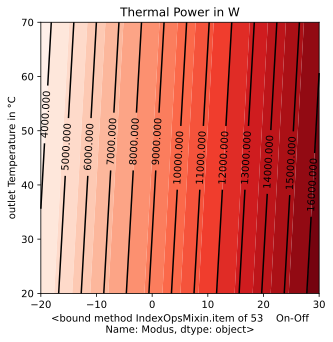

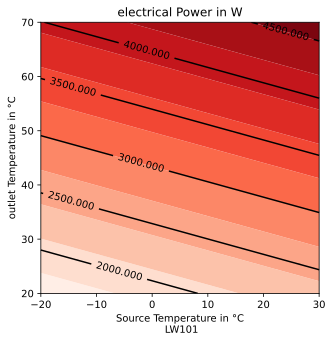

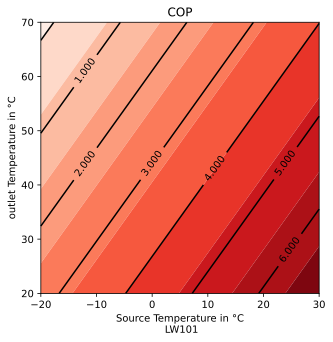

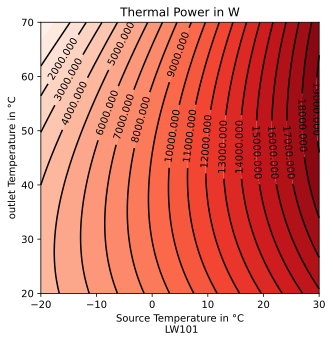

In [22]:
for model in Models:
    if model != 'LW 101':
        continue
    else:
        onemodel = paradf.loc[paradf['Model'] == model]
        value1 = onemodel['k1'].to_numpy()
        value2 = onemodel['k2'].to_numpy()
        value3 = onemodel['k3'].to_numpy()
        modus = onemodel['Modus'].item
        Tin=[]
        Tout=[]
        Pth=[]
        T_low=[*range(-20,31,1)]
        T_high=[*range(20,71,1)]
        for element1 in T_low:
            for element2 in T_high:
                p_th = element1*value1[0] + element2 *value2[0] + value3[0]
                Tin.append(element1)
                Tout.append(element2)
                Pth.append(p_th)
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(1000,20000,1000)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel(modus)
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
        value1 = onemodel['k4'].to_numpy()
        value2 = onemodel['k5'].to_numpy()
        value3 = onemodel['k6'].to_numpy()
        modus = onemodel['Modus'].item
        Tin=[]
        Tout=[]
        Pth=[]
        T_low=[*range(-20,31,1)]
        T_high=[*range(20,71,1)]
        for element1 in T_low:
            for element2 in T_high:
                p_th = element1*value1[0] + element2 *value2[0] + value3[0]
                Tin.append(element1)
                Tout.append(element2)
                Pth.append(p_th)
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(0000,5000,500)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('electrical Power in W')
        ax.set_xlabel('Source Temperature in °C\n LW101')
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
        value1 = onemodel['k7'].to_numpy()
        value2 = onemodel['k8'].to_numpy()
        value3 = onemodel['k9'].to_numpy()
        modus = onemodel['Modus'].item
        Tin=[]
        Tout=[]
        Pth=[]
        T_low=[*range(-20,31,1)]
        T_high=[*range(20,71,1)]
        for element1 in T_low:
            for element2 in T_high:
                p_th = element1*value1[0] + element2 *value2[0] + value3[0]
                Tin.append(element1)
                Tout.append(element2)
                Pth.append(p_th)
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(0,10,1)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('COP')
        ax.set_xlabel('Source Temperature in °C\n LW101')
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()
        k1 = onemodel['k1'].to_numpy()[0]
        k2 = onemodel['k2'].to_numpy()[0]
        k3 = onemodel['k3'].to_numpy()[0]
        k4 = onemodel['k4'].to_numpy()[0]
        k5 = onemodel['k5'].to_numpy()[0]
        k6 = onemodel['k6'].to_numpy()[0]
        k7 = onemodel['k7'].to_numpy()[0]
        k8 = onemodel['k8'].to_numpy()[0]
        k9 = onemodel['k9'].to_numpy()[0]
        modus = onemodel['Modus'].item
        Tin=[]
        Tout=[]
        Pth=[]
        T_low=[*range(-20,31,1)]
        T_high=[*range(20,71,1)]
        for x in T_low:
            for y in T_high:
                p_th = k4*k7*x*x+(k4*k8+k5*k7)*x*y+(k4*k9+k6*k7)*x+(k6*k8+k5*k9)*y+k6*k9+k5*k8*y*y
                Tin.append(x)
                Tout.append(y)
                Pth.append(p_th)
        heatingPower=pd.DataFrame()
        heatingPower['Tin']=Tin
        heatingPower['Tout']=Tout
        heatingPower['Pth']=Pth
        heatingPower
        Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
        Tin_unique = np.sort(heatingPower.Tin.unique())
        Tout_unique = np.sort(heatingPower.Tout.unique())
        Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
        set_matplotlib_formats('svg')
        rcParams['figure.figsize'] = 5, 5 # sets plot size
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # Define levels in z-axis where we want lines to appear
        levels = np.array([*range(1000,20000,1000)])

        # Generate a color mapping of the levels we've specified
        import matplotlib.cm as cm # matplotlib's color map library
        cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

        # Set all level lines to black
        line_colors = ['black' for l in cpf.levels]

        # Make plot and customize axes
        cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
        ax.clabel(cp, fontsize=10, colors=line_colors)
        ax.set_title('Thermal Power in W')
        ax.set_xlabel('Source Temperature in °C\n LW101')
        _ = ax.set_ylabel('outlet Temperature in °C')
        plt.show()

In [8]:
#data_keymark=data_keymark.merge(paradf, how='inner', on='Model')
data_key = pd.read_csv('hplib-database_heating.csv', delimiter=',')
data_key.loc[data_key['Model']== 'LW 101']

,Manufacturer,Model,Date,Type,SPL indoor [dBA],SPL outdoor [dBA],Refrigerant,Mass of Refrigerant [kg],PSB [W],Prated [W],Guideline,Climate,T_in [°C],T_out [°C],P_th [W],COP,P_el [W]
488,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.90,EN 14825,average,-7,34,7530,2.97,2535
489,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.35,EN 14825,average,-7,52,6980,2.03,3438
490,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.90,EN 14825,average,2,30,9540,3.78,2524
491,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.35,EN 14825,average,2,42,9410,3.11,3026
492,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.90,EN 14825,average,7,27,10430,4.69,2224
493,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.35,EN 14825,average,7,36,10400,4.04,2574
494,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.90,EN 14825,average,12,24,12190,5.15,2367
495,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,NaN,NaN,R407c,4.8,10,9.35,EN 14825,average,12,30,12170,5.02,2424
496,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,58.0,NaN,R407c,4.8,10,11.53,EN 14825,warm,2,35,9500,3.56,2669
497,ait-deutschland,LW 101,2019-10-08,Outdoor Air/Water,58.0,NaN,R407c,4.8,10,11.30,EN 14825,warm,2,55,9230,2.52,3663


In [6]:
paradf.to_csv('para.csv', encoding='utf-8', index=False)

In [37]:
paradf = pd.read_csv('para.csv', delimiter=',')
print(paradf.loc[paradf['Model']=='LW 101'])
paradf.loc[paradf['Model']=='LWDV 91-1/3-HDV 9-1/3']


     Model          k1         k2           k3         k4         k5  \
53  LW 101  246.732926 -13.453595  9413.693535  13.442476  47.406323   

           k6        k7        k8        k9   Modus  
53  941.86097  0.083638 -0.058388  5.565618  On-Off  


,Model,k1,k2,k3,k4,k5,k6,k7,k8,k9,Modus
85,LWDV 91-1/3-HDV 9-1/3,-70.048687,103.769491,1228.246492,-50.072666,64.393438,-845.20745,0.175422,-0.09999,7.803686,Inverter


In [21]:
data_key.loc[data_key['Model']== 'LWCV 82R1/3']

,Manufacturer,Model,Date,Type,SPL indoor [dBA],SPL outdoor [dBA],Refrigerant,Mass of Refrigerant [kg],PSB [W],Prated [W],Guideline,Climate,T_in [°C],T_out [°C],P_th [W],COP,P_el [W]
1388,ait-deutschland,LWCV 82R1/3,2019-03-27,Outdoor Air/Water,48.0,NaN,R410a,3.0,31,6.70,EN 14825,average,-7,34,5880,3.26,1804
1389,ait-deutschland,LWCV 82R1/3,2019-03-27,Outdoor Air/Water,48.0,NaN,R410a,3.0,31,5.65,EN 14825,average,-7,52,5040,2.31,2182
1390,ait-deutschland,LWCV 82R1/3,2019-03-27,Outdoor Air/Water,48.0,NaN,R410a,3.0,31,6.70,EN 14825,average,2,30,3840,4.70,817
1391,ait-deutschland,LWCV 82R1/3,2019-03-27,Outdoor Air/Water,48.0,NaN,R410a,3.0,31,5.65,EN 14825,average,2,42,3480,3.43,1015
1392,ait-deutschland,LWCV 82R1/3,2019-03-27,Outdoor Air/Water,48.0,NaN,R410a,3.0,31,6.70,EN 14825,average,7,27,3270,5.97,548
1393,ait-deutschland,LWCV 82R1/3,2019-03-27,Outdoor Air/Water,48.0,NaN,R410a,3.0,31,5.65,EN 14825,average,7,36,3040,4.86,626
1394,ait-deutschland,LWCV 82R1/3,2019-03-27,Outdoor Air/Water,48.0,NaN,R410a,3.0,31,6.70,EN 14825,average,12,24,3360,7.92,424
1395,ait-deutschland,LWCV 82R1/3,2019-03-27,Outdoor Air/Water,48.0,NaN,R410a,3.0,31,5.65,EN 14825,average,12,30,3390,6.56,517
1396,ait-deutschland,LWCV 82R1/3,2019-03-27,Outdoor Air/Water,48.0,NaN,R410a,3.0,31,4.10,EN 14825,warm,2,35,4070,4.15,981
1397,ait-deutschland,LWCV 82R1/3,2019-03-27,Outdoor Air/Water,48.0,NaN,R410a,3.0,31,5.50,EN 14825,warm,2,55,5550,2.69,2063


In [18]:
data_key.loc[data_key['Model']== 'LW 180A']

,Manufacturer,Model,Date,Type,SPL indoor [dBA],SPL outdoor [dBA],Refrigerant,Mass of Refrigerant [kg],PSB [W],Prated [W],Guideline,Climate,T_in [°C],T_out [°C],P_th [W],COP,P_el [W]
656,ait-deutschland,LW 180A,2019-10-08,Outdoor Air/Water,59.0,57.0,R407c,6.8,10,20.03,EN 14825,average,-7,34,14280,2.94,4857
657,ait-deutschland,LW 180A,2019-10-08,Outdoor Air/Water,59.0,57.0,R407c,6.8,10,18.50,EN 14825,average,-7,52,12780,1.94,6588
658,ait-deutschland,LW 180A,2019-10-08,Outdoor Air/Water,59.0,57.0,R407c,6.8,10,20.03,EN 14825,average,2,30,17480,3.94,4437
659,ait-deutschland,LW 180A,2019-10-08,Outdoor Air/Water,59.0,57.0,R407c,6.8,10,18.50,EN 14825,average,2,42,16920,2.93,5775
660,ait-deutschland,LW 180A,2019-10-08,Outdoor Air/Water,59.0,57.0,R407c,6.8,10,20.03,EN 14825,average,7,27,10090,5.38,1875
661,ait-deutschland,LW 180A,2019-10-08,Outdoor Air/Water,59.0,57.0,R407c,6.8,10,18.50,EN 14825,average,7,36,10080,4.21,2394
662,ait-deutschland,LW 180A,2019-10-08,Outdoor Air/Water,59.0,57.0,R407c,6.8,10,20.03,EN 14825,average,12,24,12900,5.96,2164
663,ait-deutschland,LW 180A,2019-10-08,Outdoor Air/Water,59.0,57.0,R407c,6.8,10,18.50,EN 14825,average,12,30,12860,5.39,2386
664,ait-deutschland,LW 180A,2019-10-08,Outdoor Air/Water,59.0,57.0,R407c,6.8,10,17.30,EN 14825,warm,2,35,17300,3.56,4860
665,ait-deutschland,LW 180A,2019-10-08,Outdoor Air/Water,59.0,57.0,R407c,6.8,10,16.23,EN 14825,warm,2,55,16230,2.18,7445
